# Projeto Airbnb Rio - Ferramenta de Previsão de Preço de Imóvel para pessoas comuns 

### Cenário

Na plataforma de aluguel de imóveis Airbnb, o indivíduo que possua um quarto ou imóvel de qualquer tipo (apartamento, casa, chalé, pousada, etc.) pode disponibilizar o seu imóvel para ser alugado por diária.

Neste caso, o proprietário cria um perfil de "host" (pessoa que disponibiliza um imóvel para aluguel por diária) e desenvolve o anúncio do seu imóvel

Neste anúncio, o "host" deve descrever as características do imóvel da forma mais completa possível, de forma a ajudar os locadores/viajantes a escolherem o melhor imóvel para eles (e de forma a tornar o seu anúncio mais atrativo)

### Objetivo

Construir um modelo de previsão de preço que permita uma pessoa comum que possui um imóvel possa saber quanto deve cobrar pela diária do seu imóvel.

Ou ainda, para o locador comum, dado o imóvel que ele está buscando, ajudar a saber se aquele imóvel está com preço atrativo (abaixo da média para imóveis com as mesmas características) ou não.

### Informações Disponíveis

As bases de dados foram retiradas do site kaggle: https://www.kaggle.com/allanbruno/airbnb-rio-de-janeiro

### Importar Bibliotecas e Bases de Dados

In [ ]:
import pandas as pd
import pathlib #permite navegar por todos os arquivos de uma pasta

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import plotly.express as px

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split

In [3]:
meses = {"jan":1, "fev":2, "mar":3, "abr":4, "mai":5, "jun":6, "jul":7, "ago":8, "set":9, "out":10, "nov":11, "dez":12}

caminho_bases = pathlib.Path("dataset")
base_airbnb = pd.DataFrame()

for arquivo in caminho_bases.iterdir():
    nome_mes = arquivo.name[:3]
    mes = meses[nome_mes]

    ano = arquivo.name[-8:]
    ano = int(ano.replace(".csv", ""))

    df = pd.read_csv(caminho_bases/arquivo.name)
    df["ano"] = ano
    df["mes"] = mes
    base_airbnb = pd.concat([base_airbnb,df])

display(base_airbnb)

/var/folders/hm/zt2rcb3j1zvcdyw8zl9n4n2w0000gn/T/ipykernel_11765/3541276222.py:13: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_bases/arquivo.name)
/var/folders/hm/zt2rcb3j1zvcdyw8zl9n4n2w0000gn/T/ipykernel_11765/3541276222.py:13: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_bases/arquivo.name)
/var/folders/hm/zt2rcb3j1zvcdyw8zl9n4n2w0000gn/T/ipykernel_11765/3541276222.py:13: DtypeWarning: Columns (87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_bases/arquivo.name)
/var/folders/hm/zt2rcb3j1zvcdyw8zl9n4n2w0000gn/T/ipykernel_11765/3541276222.py:13: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_bases/arquivo.name)
/var/folders/hm/zt2rcb3j1zvcdyw8zl9n4n2w0000gn/T/ipykernel

id                            listing_url       scrape_id  \
0         17878     https://www.airbnb.com/rooms/17878  20200121213543   
1         21280     https://www.airbnb.com/rooms/21280  20200121213543   
2         25026     https://www.airbnb.com/rooms/25026  20200121213543   
3         31560     https://www.airbnb.com/rooms/31560  20200121213543   
4         35636     https://www.airbnb.com/rooms/35636  20200121213543   
...         ...                                    ...             ...   
36373  33014188  https://www.airbnb.com/rooms/33014188  20190313042552   
36374  33014427  https://www.airbnb.com/rooms/33014427  20190313042552   
36375  33016673  https://www.airbnb.com/rooms/33016673  20190313042552   
36376  33021915  https://www.airbnb.com/rooms/33021915  20190313042552   
36377  33022085  https://www.airbnb.com/rooms/33022085  20190313042552   

      last_scraped                                               name  \
0       2020-01-22                  Very Nice 2Br - Copacabana - WiFi   
1       2020-01-22                   Renovated Modern Apt. Near Beach   
2       2020-01-22          Beautiful Modern Decorated Studio in Copa   
3       2020-01-22                   NICE & COZY 1BDR - IPANEMA BEACH   
4       2020-01-22                   Cosy flat close to Ipanema beach   
...            ...                                                ...   
36373   2019-03-13                Ótimo apartamento à 3 ruas da praia   
36374   2019-03-13          Maravilhoso Apto Com Vista Total Do Mar!!   
36375   2019-03-13            Próximo metrô largo do Machado e catete   
36376   2019-03-13  Aconchegante apt no posto 2, 100m praia, vista...   
36377   2019-03-13       Belíssimo conjugado no posto 2, a 100m praia   

                                                 summary  \
0      Pls note that special rates apply for Carnival...   
1      Immaculately renovated top-floor apartment ove...   
2      Our apartment is a little gem, everyone loves ...   
3      This nice and clean 1 bedroom apartment is loc...   
4      This cosy apartment  is just a few steps away ...   
...                                                  ...   
36373                                                NaN   
36374  Apartamento recém reformado, novinho e pronto ...   
36375                                                NaN   
36376                                                NaN   
36377                                                NaN   

                                                   space  \
0      - large balcony which looks out on pedestrian ...   
1      Immaculately renovated top-floor apartment in ...   
2      This newly renovated studio (last renovations ...   
3      This nice and clean 1 bedroom apartment is loc...   
4      The location is extremely convenient, safe and...   
...                                                  ...   
36373                                                NaN   
36374                                                NaN   
36375                                                NaN   
36376                                                NaN   
36377                                                NaN   

                                             description experiences_offered  \
0      Pls note that special rates apply for Carnival...                none   
1      Immaculately renovated top-floor apartment ove...                none   
2      Our apartment is a little gem, everyone loves ...                none   
3      This nice and clean 1 bedroom apartment is loc...                none   
4      This cosy apartment  is just a few steps away ...                none   
...                                                  ...                 ...   
36373  O bairro é simplesmente maravilhoso, a 5min a ...                none   
36374  Apartamento recém reformado, novinho e pronto ...                none   
36375  Próximo ao metrô largo do Machado e catete, me...                none   
36376

* Como possuímos muitas colunas, o modelo pode acabar ficando lento. Além disso, uma análise rápida permite compreender que várias colunas não são necessarias para o modelo de previsão, evidenciado este motivo, algumas colunas da base serão excluídas.

* Com o intuito de facilitar a compreensão, as colunas que excluídas classificam-se como:
1. IDs, links e informações não relevantes para o modelo.
2. Colunas repetidas ou extremamente parecidas com outra (Fornecem a mesma informação para o modelo. Ex: Data x Ano/mês).
3. Colunas preenchidas com texto livre -> Não será realizada nenhuma análise de palavras.
4. Colunas em que todos ou quase todos os valores são iguais

* Para obter tal visibilidade, criarei um arquivo em excel com os 1.000 primeiros registros para realizar uma análise qualitativa:

### Consolidar Base de Dados

In [4]:
print(list(base_airbnb.columns))
base_airbnb.head(1000).to_csv("primeiros_registros.csv", sep=";")

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', '

### Identificar quais colunas podem ser excluídas

In [5]:
print(base_airbnb["experiences_offered"].value_counts())
#validar se existe alguma informacao contida na coluna em especifico

none    902210
Name: experiences_offered, dtype: int64


In [6]:
print((base_airbnb["host_listings_count"]==base_airbnb["host_total_listings_count"]).value_counts())
#identificar pontos iguais nas colunas, no fim, value counts averigua quantos sao verdadeiros (iguais)

True     901750
False       460
dtype: int64


In [7]:
print(base_airbnb["square_feet"].isnull().sum())
#soma os valores vazios de uma coluna

888162


Depois da análise qualitativa das colunas, levando em conta os critérios explicados acima, o modelo será mantido com as seguintes colunas:

In [8]:
colunas = ['host_response_time','host_response_rate','host_is_superhost','host_listings_count','latitude','longitude','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities','price','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','is_business_travel_ready','cancellation_policy','ano','mes']

base_airbnb = base_airbnb.loc[:, colunas]
display(base_airbnb)

host_response_time host_response_rate host_is_superhost  \
0          within an hour               100%                 t   
1          within an hour               100%                 f   
2            within a day                86%                 f   
3          within an hour               100%                 t   
4          within an hour               100%                 f   
...                   ...                ...               ...   
36373                 NaN                NaN                 f   
36374                 NaN                NaN                 f   
36375                 NaN                NaN                 f   
36376  within a few hours                84%                 f   
36377  within a few hours                84%                 f   

       host_listings_count  latitude  longitude property_type  \
0                      2.0 -22.96592  -43.17896   Condominium   
1                      0.0 -22.98467  -43.19611     Apartment   
2                      3.0 -22.97712  -43.19045     Apartment   
3                      1.0 -22.98302  -43.21427     Apartment   
4                      1.0 -22.98816  -43.19359     Apartment   
...                    ...       ...        ...           ...   
36373                  1.0 -23.02612  -43.46498   Condominium   
36374                  1.0 -23.01049  -43.36381     Apartment   
36375                  1.0 -22.92795  -43.17568     Apartment   
36376                 34.0 -22.96248  -43.17447     Apartment   
36377                 34.0 -22.96248  -43.17447     Apartment   

             room_type  accommodates  bathrooms  ...  \
0      Entire home/apt             5        1.0  ...   
1      Entire home/apt             6        2.0  ...   
2      Entire home/apt             2        1.0  ...   
3      Entire home/apt             3        1.0  ...   
4      Entire home/apt             2        1.5  ...   
...                ...           ...        ...  ...   
36373  Entire home/apt             6        2.5  ...   
36374  Entire home/apt             6        1.0  ...   
36375  Entire home/apt             2        1.0  ...   
36376  Entire home/apt             5        1.0  ...   
36377  Entire home/apt             5        1.0  ...   

       review_scores_cleanliness  review_scores_checkin  \
0                           10.0                   10.0   
1                           10.0                   10.0   
2                           10.0                    9.0   
3                           10.0                   10.0   
4                            9.0                   10.0   
...                          ...                    ...   
36373                        NaN                    NaN   
36374                        NaN                    NaN   
36375                        NaN                    NaN   
36376                        NaN                    NaN   
36377                        NaN                    NaN   

      review_scores_communication review_scores_location review_scores_value  \
0                            10.0                   10.0                 9.0   
1                            10.0                   10.0                10.0   
2                            10.0                   10.0                 9.0   
3                            10.0                   10.0                10.0   
4                            10.0                   10.0                 9.0   
...                           ...                    ...                 ...   
36373                         NaN                    NaN                 NaN   
36374                         NaN                    NaN                 NaN   
36375                         NaN                    NaN                 NaN   
36376                         NaN                    NaN                 NaN   
36377                         NaN                    NaN                 NaN   

      instant_bookable is_business_travel_ready          cancellation_policy  \
0         

### Tratar Valores Faltando

- Visualizando os dados, percebe-se que existe uma grande disparidade em dados faltantes. As colunas com mais de 300.000 valores NaN foram excluídas da análise.
- Para as outras colunas, devido a existência de muitos dados (mais de 900.000 linhas) vamos excluir as linhas que contém dados NaN.

In [9]:
#filtrar valores vazios nas colunas. Identificar quais apresentam representatividade em termos de valores faltantes e cortá-los. 
for coluna in base_airbnb:
    if base_airbnb[coluna].isnull().sum() > 300000:
        base_airbnb = base_airbnb.drop(coluna, axis=1)
print(base_airbnb.isnull().sum())

host_is_superhost            460
host_listings_count          460
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                   1724
bedrooms                     850
beds                        2502
bed_type                       0
amenities                      0
price                          0
guests_included                0
extra_people                   0
minimum_nights                 0
maximum_nights                 0
number_of_reviews              0
instant_bookable               0
is_business_travel_ready       0
cancellation_policy            0
ano                            0
mes                            0
dtype: int64


In [10]:
base_airbnb = base_airbnb.dropna() 
#dropna() tira todos os valores NaN

print(base_airbnb.shape)
print(base_airbnb.isnull().sum())

(897709, 23)
host_is_superhost           0
host_listings_count         0
latitude                    0
longitude                   0
property_type               0
room_type                   0
accommodates                0
bathrooms                   0
bedrooms                    0
beds                        0
bed_type                    0
amenities                   0
price                       0
guests_included             0
extra_people                0
minimum_nights              0
maximum_nights              0
number_of_reviews           0
instant_bookable            0
is_business_travel_ready    0
cancellation_policy         0
ano                         0
mes                         0
dtype: int64


### Verificar Tipos de Dados em cada coluna

In [11]:
print(base_airbnb.dtypes) #printa o tipo de informação em cada coluna
print("-"*60)
print(base_airbnb.iloc[0])

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                        object
guests_included               int64
extra_people                 object
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
ano                           int64
mes                           int64
dtype: object
------------------------------------------------------------
host_is_superhost                                                           t
host_listings_count

- Como preço e extra people estão sendo reconhecidos como objeto (ao invés de ser um float) será alterado o tipo de variável da coluna.

In [12]:
#price
base_airbnb["price"] = base_airbnb["price"].str.replace("$","")
base_airbnb["price"] = base_airbnb["price"].str.replace(",","")
base_airbnb["price"] = base_airbnb["price"].astype(np.float32, copy=False) #float32 é relevante pois utiliza menos espaço de memória e deixa a operação mais rápida
#extra people
base_airbnb["extra_people"] = base_airbnb["extra_people"].str.replace("$","")
base_airbnb["extra_people"] = base_airbnb["extra_people"].str.replace(",","")
base_airbnb["extra_people"] = base_airbnb["extra_people"].astype(np.float32, copy=False)
#verificando os tipos
print(base_airbnb.dtypes)

/var/folders/hm/zt2rcb3j1zvcdyw8zl9n4n2w0000gn/T/ipykernel_11765/3629720484.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  base_airbnb["price"] = base_airbnb["price"].str.replace("$","")
/var/folders/hm/zt2rcb3j1zvcdyw8zl9n4n2w0000gn/T/ipykernel_11765/3629720484.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  base_airbnb["extra_people"] = base_airbnb["extra_people"].str.replace("$","")


host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                       float32
guests_included               int64
extra_people                float32
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
ano                           int64
mes                           int64
dtype: object


### Análise Exploratória e Tratar Outliers

#### Analisar categóricamente cada feature para:
1. Identificar a correlação entre as features e decidir se quais features serão mantidas.
2. Excluir outliers (usar como regra, valores abaixo de Q1 - 1.5x Amplitude e valores acima de Q3 + 1.5x Amplitude). Amplitude = Q3 - Q1
3. Confirmar se todas as features fazem estão em consonância com o modelo ou se alguma delas não irá agregar para, assim, excluí-lá.

• A análise inicia-se pelas colunas de preço (resultado final desejado) e de extra_people (também valor monetário). Esses são os valores numéricos contínuos.
• Depois são analisdas as colunas de valores numéricos discretos (acomodates, bedrooms, guests_included, etc.)
• Por fim, avaliam-se as colunas de texto e são definidas quais categorias possuem relevância para o projeto.

Importante avaliar a exclusão de outliers, torna-se necessária compreender com exatidão o que está sendo realizado. Se não há um motivo claro para remoção de outlier, talvez não seja necessário e pode ser prejudicial para a generalização.

Exemplo: Se o objetivo é ajudar a precificar um imóvel que você está querendo disponibilizar, excluir outliers em host_listings_count pode fazer sentido.
Agora, se você é representante de uma organização com uma série de propriedades e quer comparar com outras empresas deste nicho, posicionando-se neste mercado, excluir quem tem acima de 6 propriedades pode impactar seu modelo.

<AxesSubplot:>

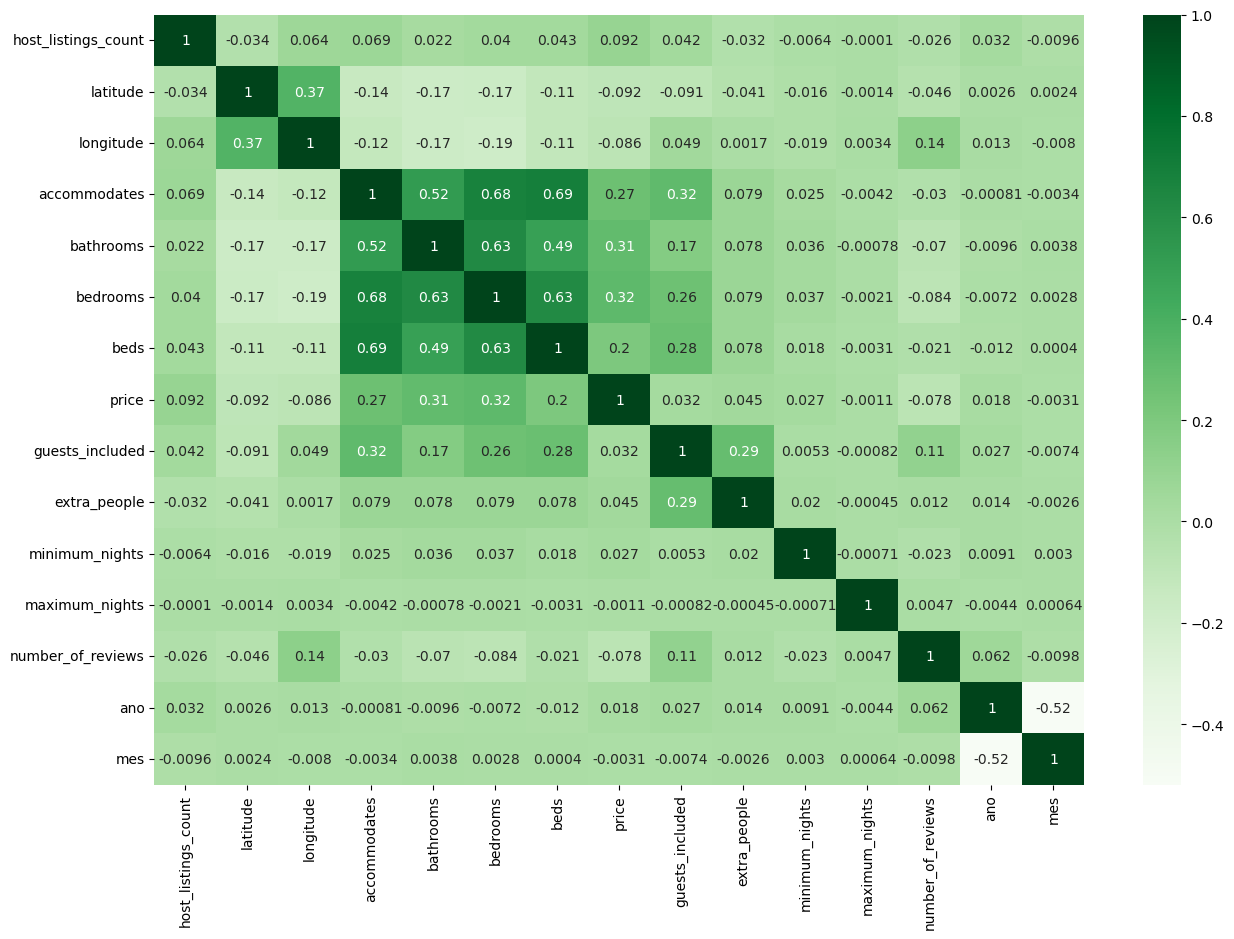

In [13]:
#print(base_airbnb.corr()) mostra a correlação dos dados na tabela

plt.figure(figsize=(15, 10))
sns.heatmap(base_airbnb.corr(), annot=True, cmap="Greens")

### Definição de Funções para Análise de Outliers

Definir funções para ajudar na análise de outliers das colunas

In [14]:
def limites(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amplitude = q3 - q1
    return q1 - 1.5 * amplitude, q3 + 1.5 * amplitude
def excluir_outliers(df, nome_coluna):
    qtde_linhas = df.shape[0]
    lim_inf, lim_sup = limites(df[nome_coluna])
    df = df.loc[(df[nome_coluna] >= lim_inf) & (df[nome_coluna] <= lim_sup), :]
    linhas_removidas = qtde_linhas - df.shape[0]
    return df, linhas_removidas

In [15]:
print(limites(base_airbnb["price"]))
#base_airbnb["price"].describe() exibe as informações da coluna, bom para realizar prova real

(-524.0, 1276.0)


In [16]:
def diagrama_caixa(coluna):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)
    sns.boxplot(x=coluna, ax=ax1)
    ax2.set_xlim(limites(coluna))
    sns.boxplot(x=coluna, ax=ax2)

def histograma(coluna):
    plt.figure(figsize=(15, 5))
    sns.histplot(coluna, element="bars")

def grafico_barra(coluna):
    plt.figure(figsize=(15, 5))
    ax = sns.barplot(x=coluna.value_counts().index, y=coluna.value_counts())
    ax.set_xlim(limites(coluna))

### Price
* o gráfico da direita apresenta outliers acima de 1200. Valores médios estão contidos de 0 a 1200.

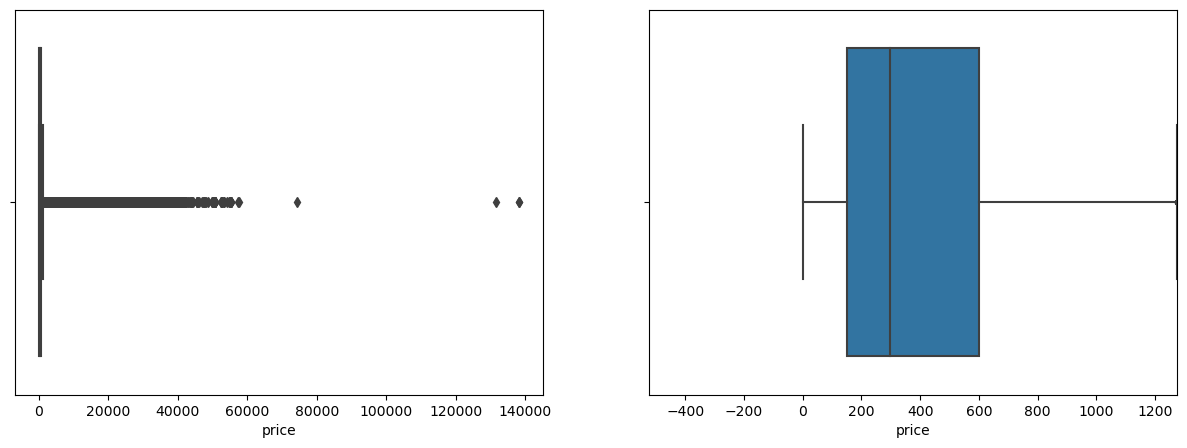

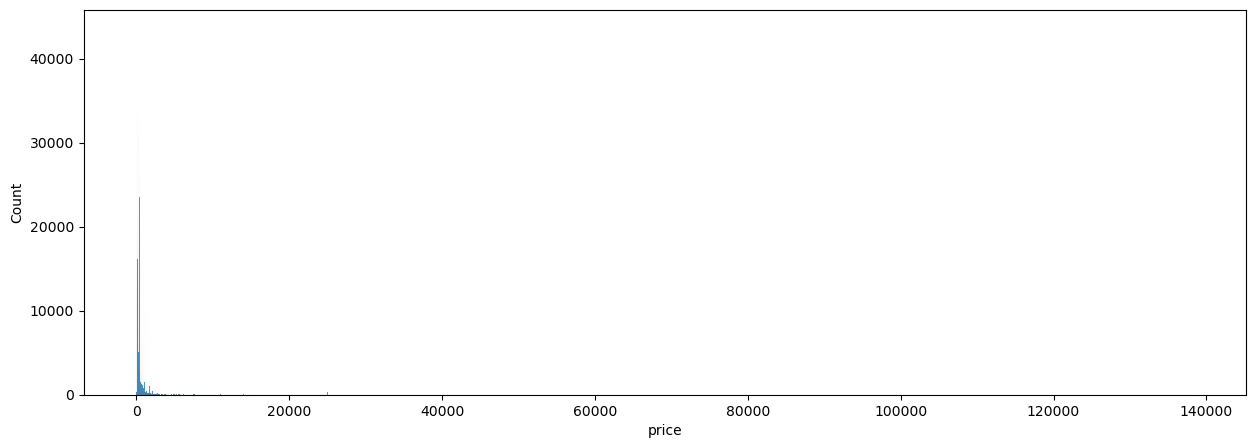

In [17]:
diagrama_caixa(base_airbnb["price"])
#o gráfico da direita apresenta no bloco todos os dados que não são outliers
#no gráfico da esquerda todas os pontos são outliers
histograma(base_airbnb["price"])


Como o objetivo visa construir um modelo para imóveis comuns, percebe-se que os valores acima do limite superior evidenciam apenas apartamentos de luxo, elemento que não caracteriza o objetivo principal. Por isso, pode-se excluir tais outliers.

In [18]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, "price")
print("{} linhas removidas".format(linhas_removidas))

87282 linhas removidas


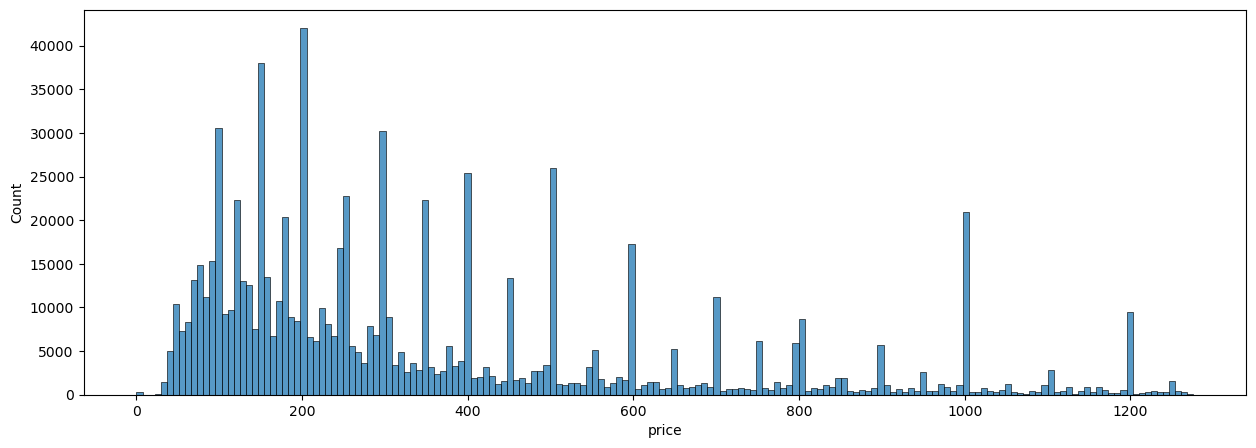

In [19]:
histograma(base_airbnb["price"])
#87 mil linhas é uma quantidade significativa, entretanto, desconsiderou-se da amostra os valores de imóveis de luxo.
#Existem picos em preços cheios, as pessoas intuitivamente costumam colocar preços cheios. 

### Extra_People

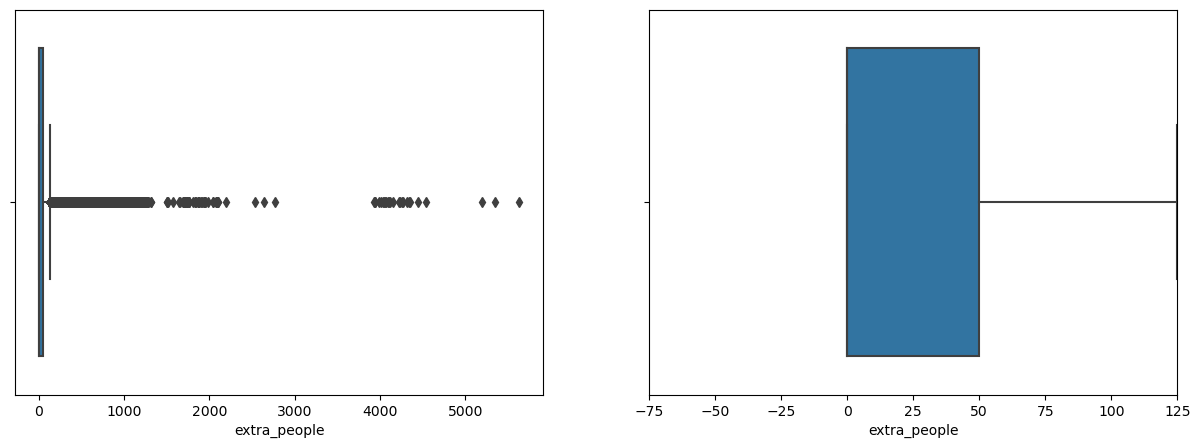

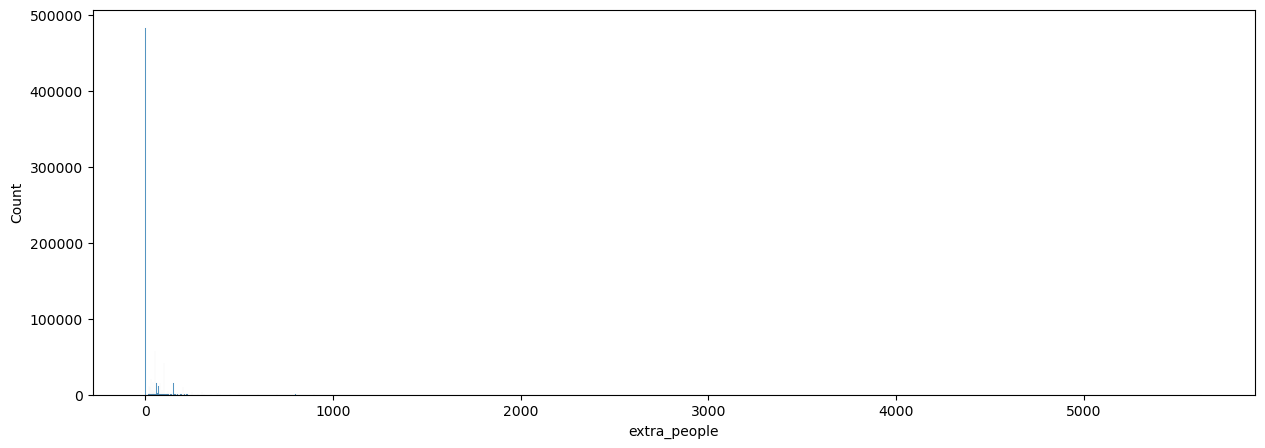

In [20]:
diagrama_caixa(base_airbnb["extra_people"])
histograma(base_airbnb["extra_people"])

In [21]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, "extra_people")
print("{} linhas removidas".format(linhas_removidas))

59194 linhas removidas


(751233, 23)


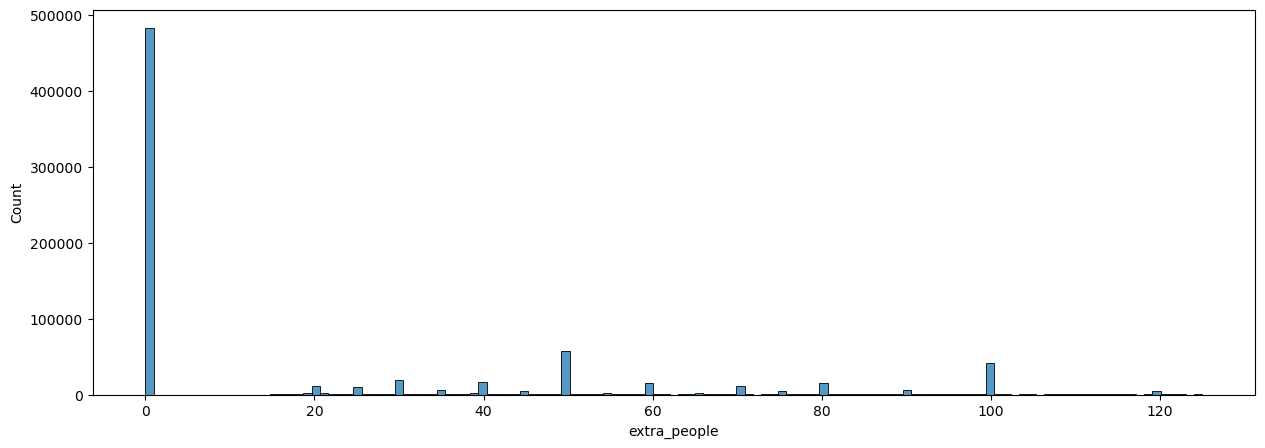

In [22]:
histograma(base_airbnb["extra_people"])
print(base_airbnb.shape)

### host_listings_count

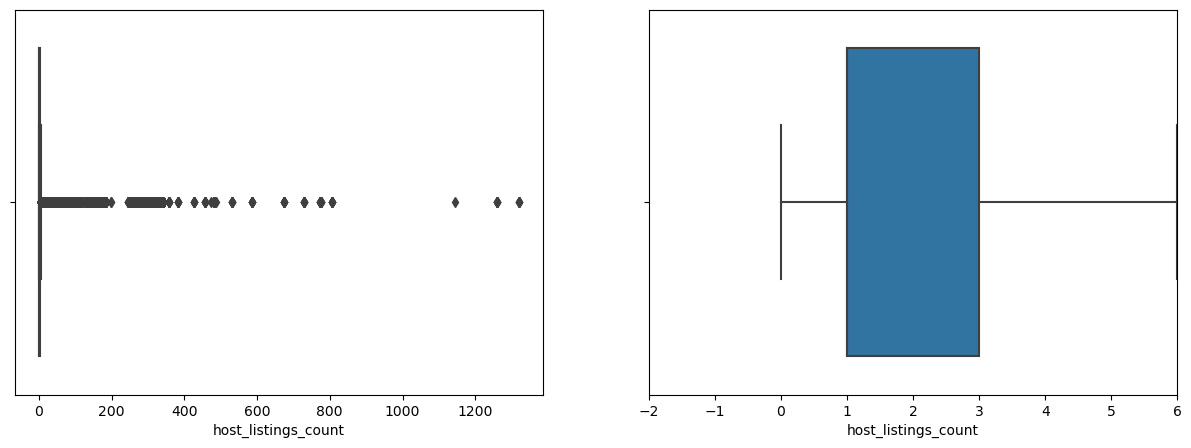

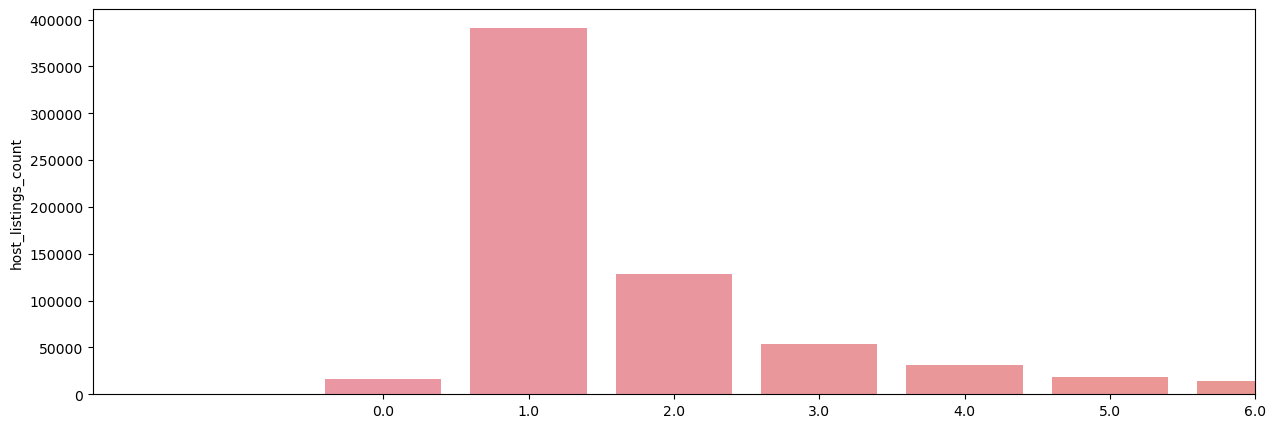

In [23]:
diagrama_caixa(base_airbnb["host_listings_count"])
grafico_barra(base_airbnb["host_listings_count"])

Neste caso, excluem-se os outliers pois, conforme o objetivo do projeto, hosts com mais de 6 imóveis no airbnb não compreendem-se como público-alvo do objetivo almejado (sugere-se que estes configuram-se como imobiliárias ou profissionais que gerenciam imóveis no airbnb)

In [24]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, "host_listings_count")
print("{} linhas removidas".format(linhas_removidas))

97723 linhas removidas


### Accommodates

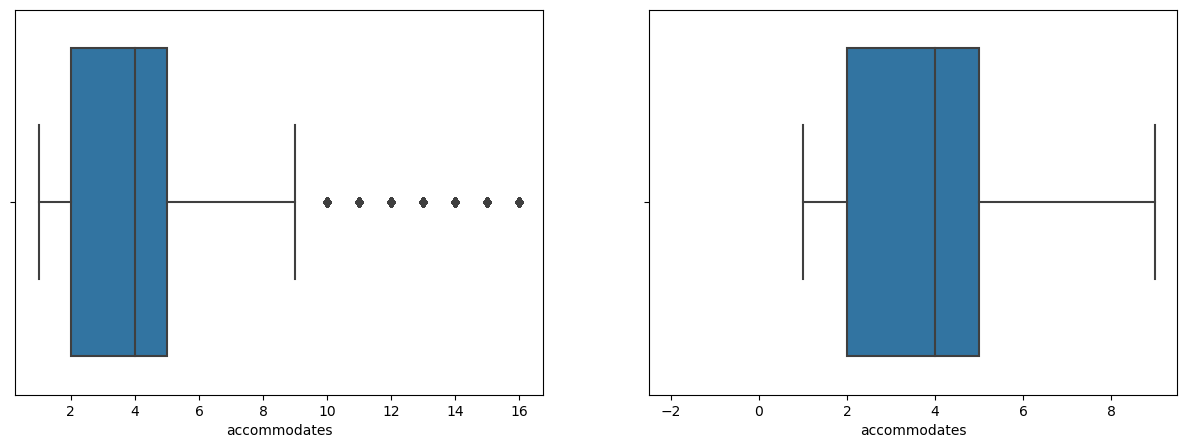

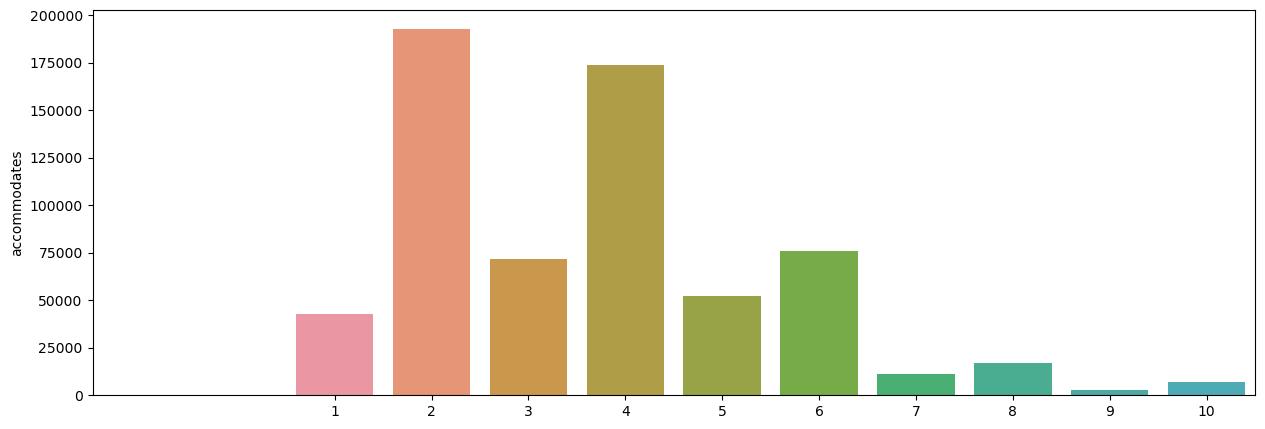

In [25]:
diagrama_caixa(base_airbnb["accommodates"])
grafico_barra(base_airbnb["accommodates"])

In [26]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, "accommodates")
print("{} linhas removidas".format(linhas_removidas))

13146 linhas removidas


### Bathrooms

<AxesSubplot:ylabel='bathrooms'>

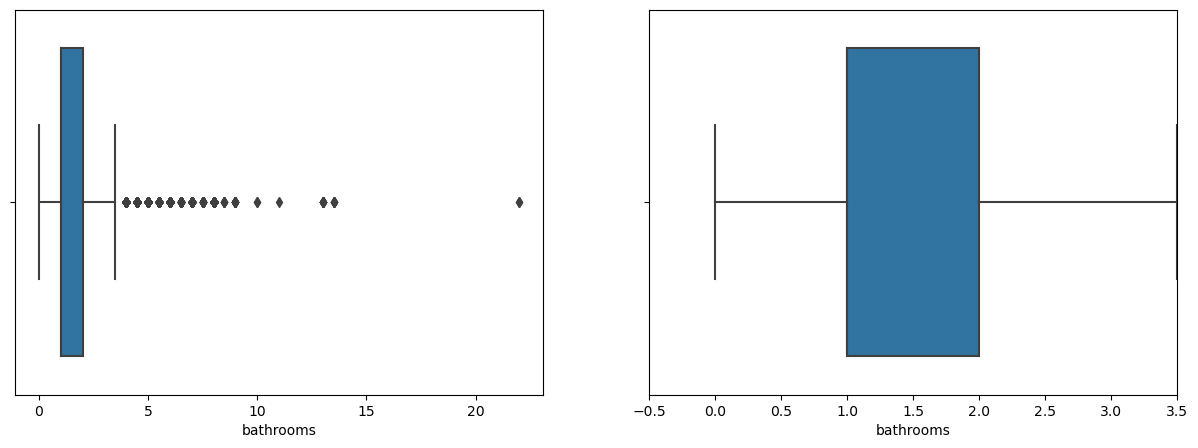

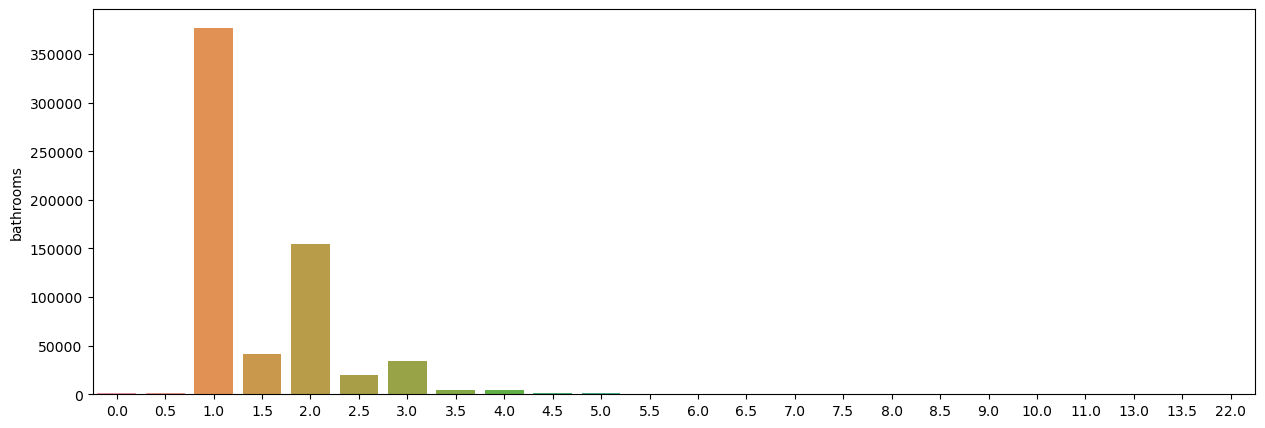

In [27]:
diagrama_caixa(base_airbnb["bathrooms"])
plt.figure(figsize=(15, 5))
sns.barplot(x=base_airbnb["bathrooms"].value_counts().index, y=base_airbnb["bathrooms"].value_counts())

In [28]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, "bathrooms")
print("{} linhas removidas".format(linhas_removidas))

6894 linhas removidas


### Bedrooms

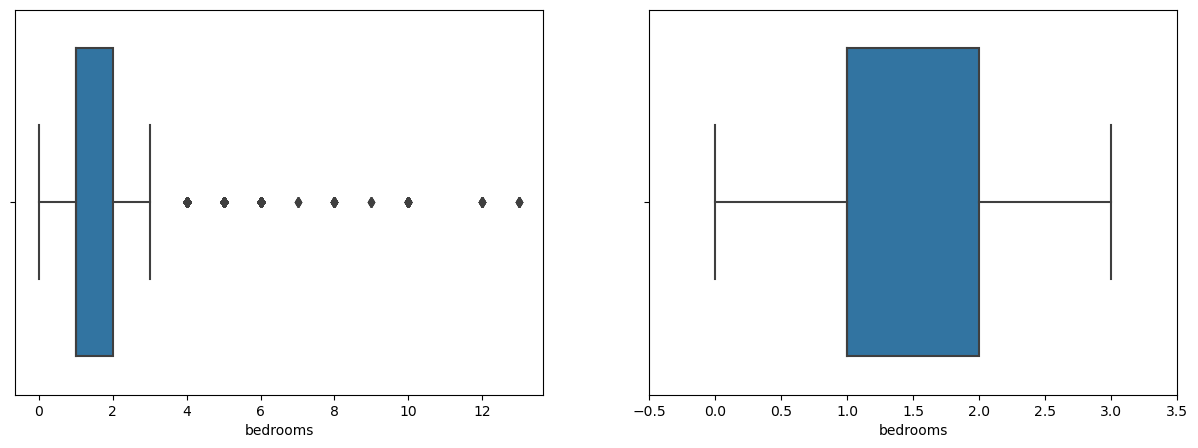

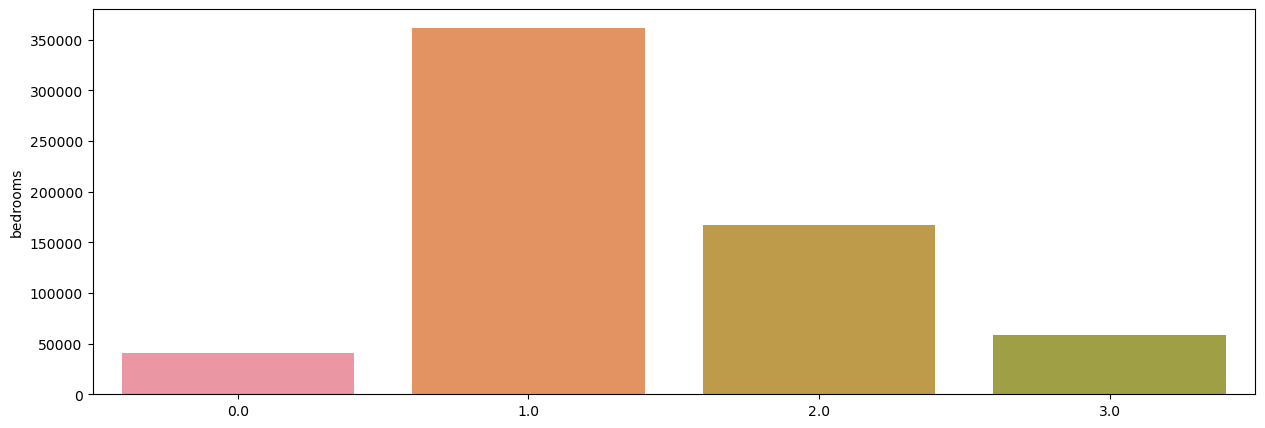

In [29]:
diagrama_caixa(base_airbnb["bedrooms"])
grafico_barra(base_airbnb["bedrooms"])

In [30]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, "bedrooms")
print("{} linhas removidas".format(linhas_removidas))

5482 linhas removidas


### Beds

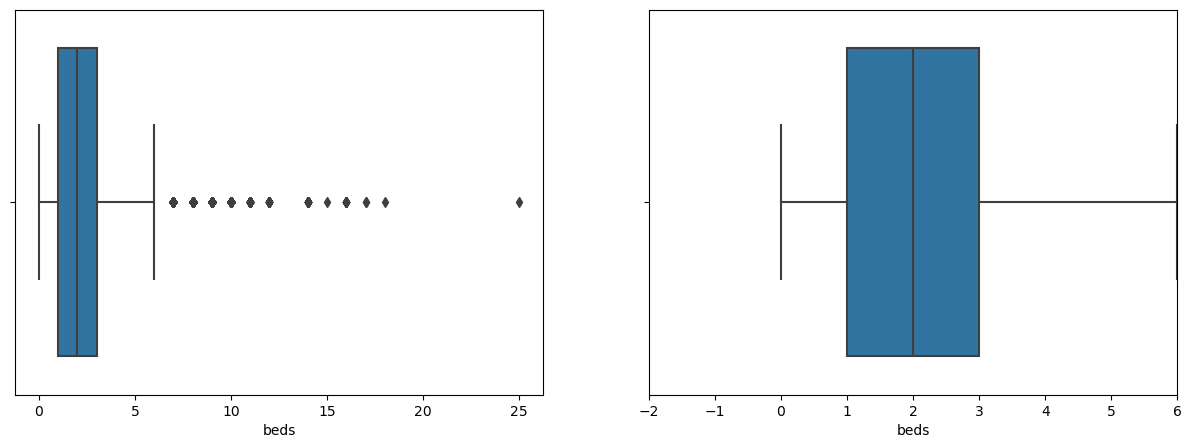

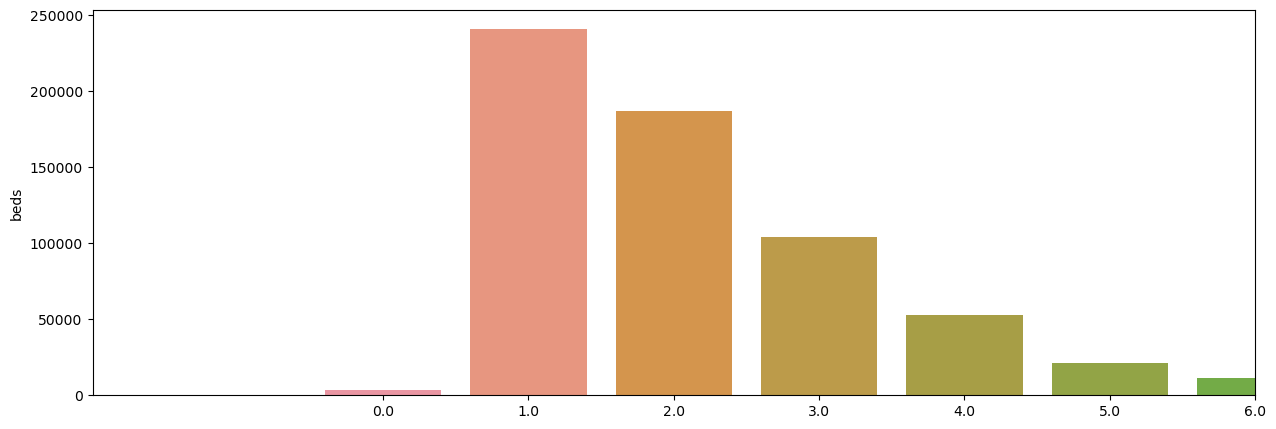

In [31]:
diagrama_caixa(base_airbnb["beds"])
grafico_barra(base_airbnb["beds"])

In [32]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, "beds")
print("{} linhas removidas".format(linhas_removidas))

5622 linhas removidas


### Guests Included

(1.0, 1.0)


<AxesSubplot:ylabel='guests_included'>

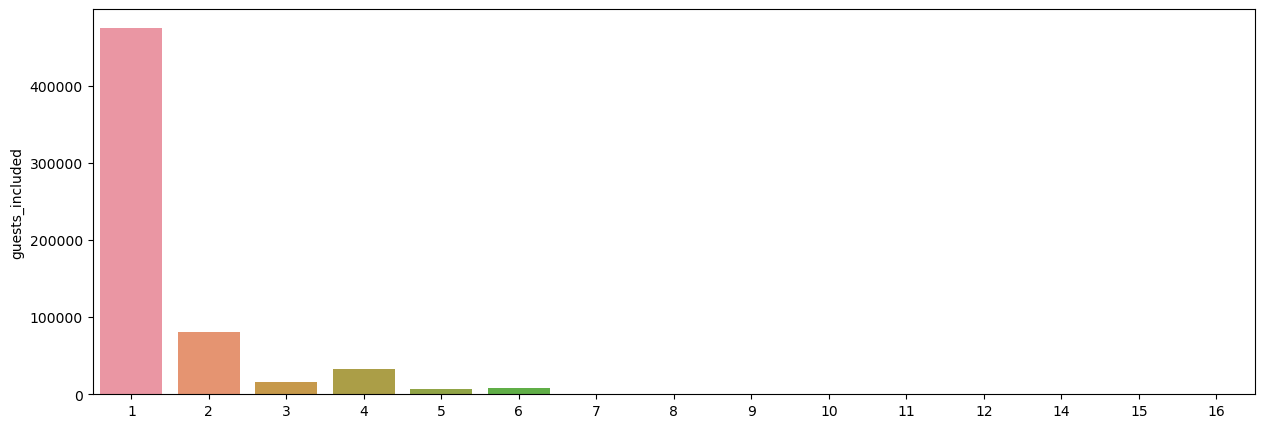

In [33]:
#diagrama_caixa(base_airbnb["guests_included"])
#grafico_barra(base_airbnb["guests_included"])
print(limites(base_airbnb["guests_included"]))
plt.figure(figsize=(15, 5))
sns.barplot(x=base_airbnb["guests_included"].value_counts().index, y=base_airbnb["guests_included"].value_counts())

Esta feature será removida da análise. Percebe-se que os usuáros do Airbnb usam utilizam o valor padrão da plataforma como 1 guest included. Tal fato pode levar o modelo a considerar uma feature que não possui relevância para a definição do preço, por isso, a melhor decisão é excluir a coluna da análise. 

In [34]:
base_airbnb = base_airbnb.drop("guests_included", axis=1)
base_airbnb.shape

(622366, 22)

### Minimum Nights

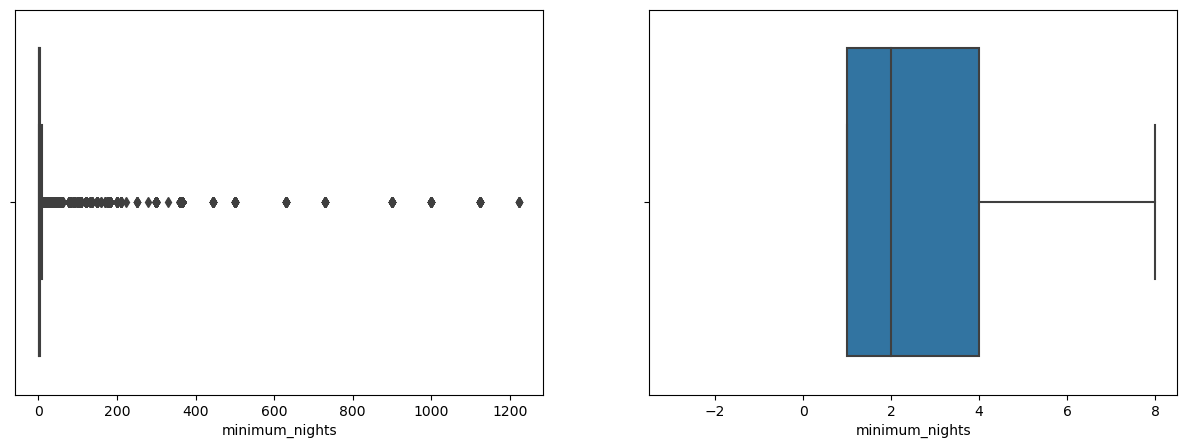

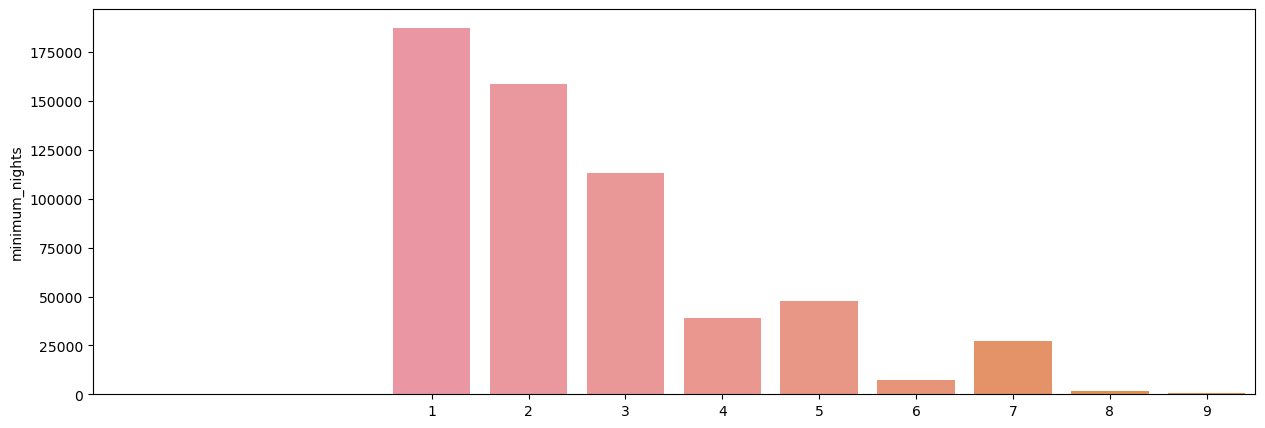

In [35]:
diagrama_caixa(base_airbnb["minimum_nights"])
grafico_barra(base_airbnb["minimum_nights"])

In [36]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, "minimum_nights")
print("{} linhas removidas".format(linhas_removidas))

40383 linhas removidas


### Maximum Nights

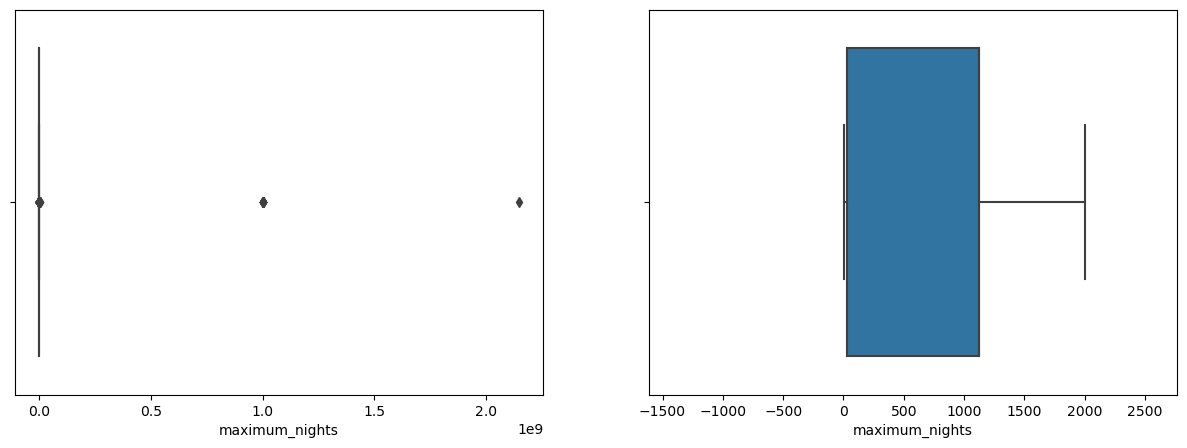

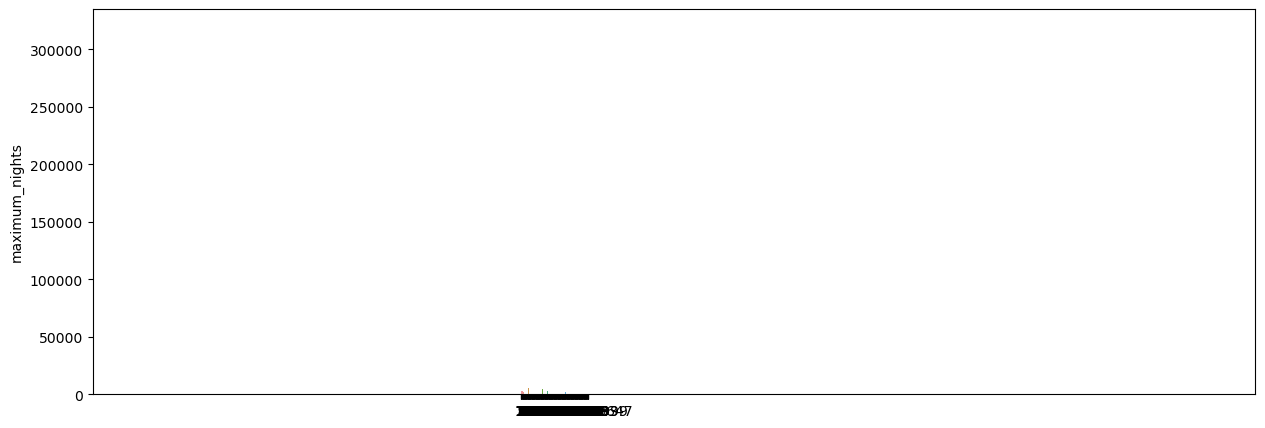

In [37]:
diagrama_caixa(base_airbnb["maximum_nights"])
grafico_barra(base_airbnb["maximum_nights"])

In [38]:
base_airbnb = base_airbnb.drop("maximum_nights", axis=1)
base_airbnb.shape

(581983, 21)

#### Number of Reviews           

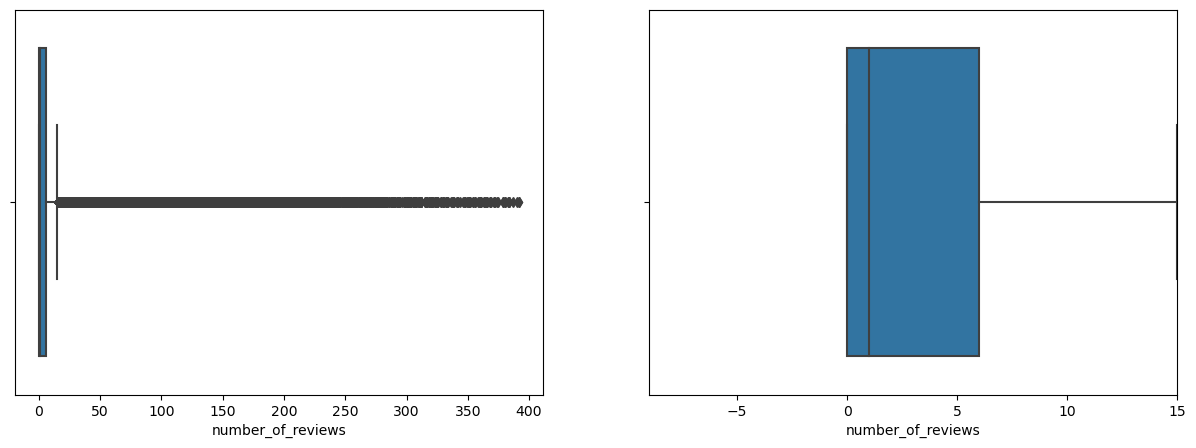

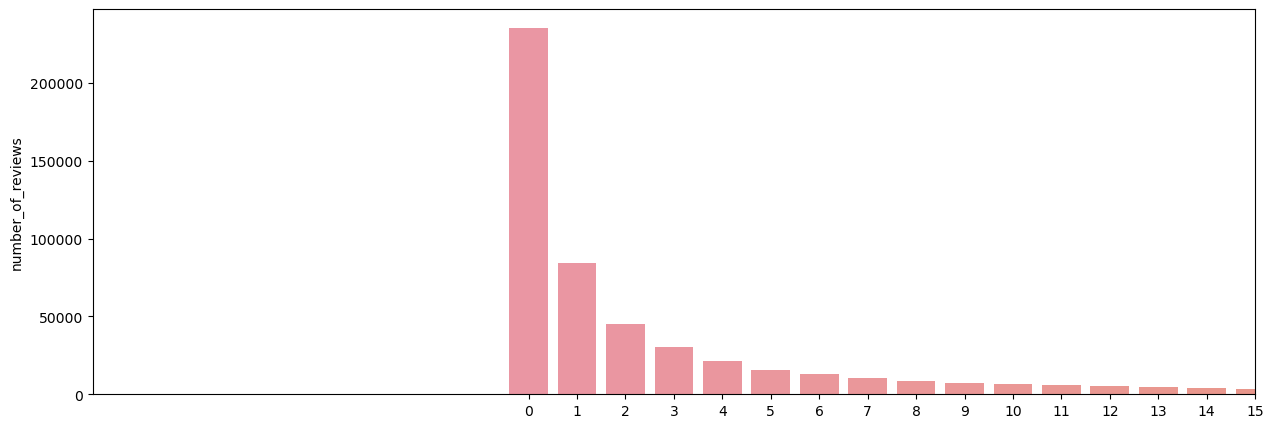

In [39]:
diagrama_caixa(base_airbnb["number_of_reviews"])
grafico_barra(base_airbnb["number_of_reviews"])

In [40]:
base_airbnb = base_airbnb.drop("number_of_reviews", axis=1)
base_airbnb.shape

(581983, 20)

### Tratamento de Colunas de Valores de Texto

- Property_Type

Apartment                 458354
House                      51387
Condominium                26456
Serviced apartment         12671
Loft                       12352
Guest suite                 3621
Bed and breakfast           3472
Hostel                      2665
Guesthouse                  2155
Other                       1957
Villa                       1294
Townhouse                    969
Aparthotel                   693
Chalet                       481
Earth house                  468
Tiny house                   457
Boutique hotel               447
Hotel                        376
Casa particular (Cuba)       298
Cottage                      230
Bungalow                     207
Dorm                         185
Cabin                        141
Nature lodge                 124
Castle                        80
Treehouse                     76
Island                        54
Boat                          53
Hut                           40
Campsite                      34
Resort    

/Users/gabrielluiz/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


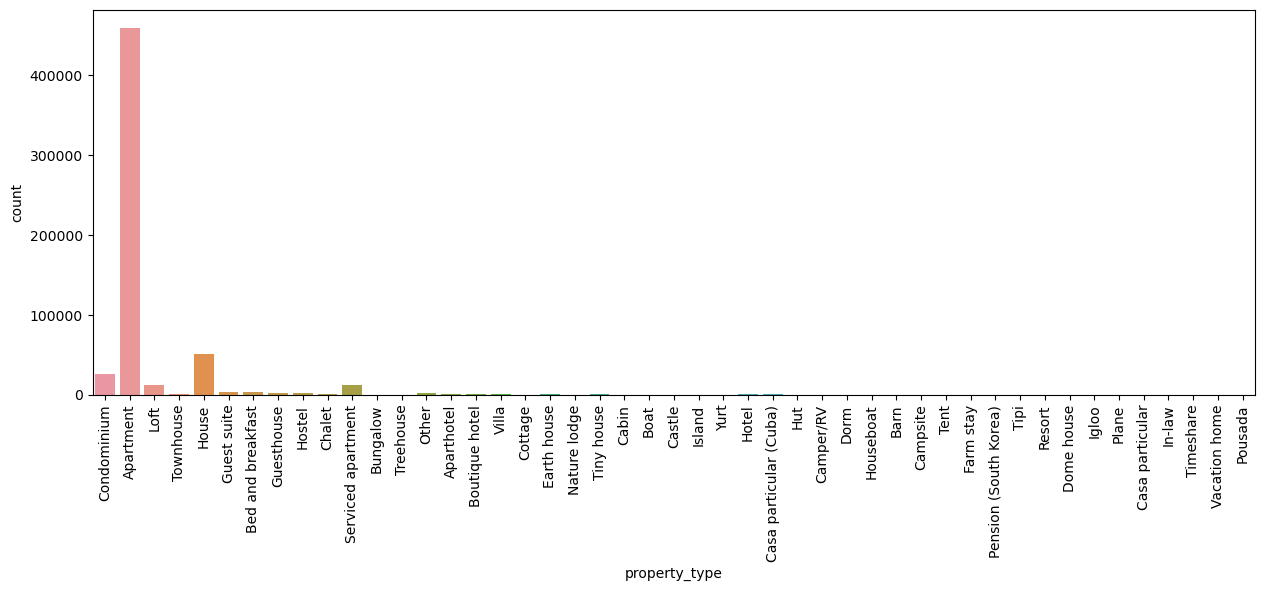

In [41]:
print(base_airbnb["property_type"].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot("property_type", data=base_airbnb)
grafico.tick_params(axis="x", rotation=90)

property_type                object
room_type                    object
bed_type                     object
amenities                    object
cancellation_policy

['Other', 'Villa', 'Townhouse', 'Aparthotel', 'Chalet', 'Earth house', 'Tiny house', 'Boutique hotel', 'Hotel', 'Casa particular (Cuba)', 'Cottage', 'Bungalow', 'Dorm', 'Cabin', 'Nature lodge', 'Castle', 'Treehouse', 'Island', 'Boat', 'Hut', 'Campsite', 'Resort', 'Camper/RV', 'Yurt', 'Tent', 'Tipi', 'Barn', 'Farm stay', 'Pension (South Korea)', 'Dome house', 'Igloo', 'In-law', 'Vacation home', 'Houseboat', 'Timeshare', 'Pousada', 'Casa particular', 'Plane']
Apartment             458354
House                  51387
Condominium            26456
Serviced apartment     12671
Loft                   12352
Outros                  8850
Guest suite             3621
Bed and breakfast       3472
Hostel                  2665
Guesthouse              2155
Name: property_type, dtype: int64


/Users/gabrielluiz/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


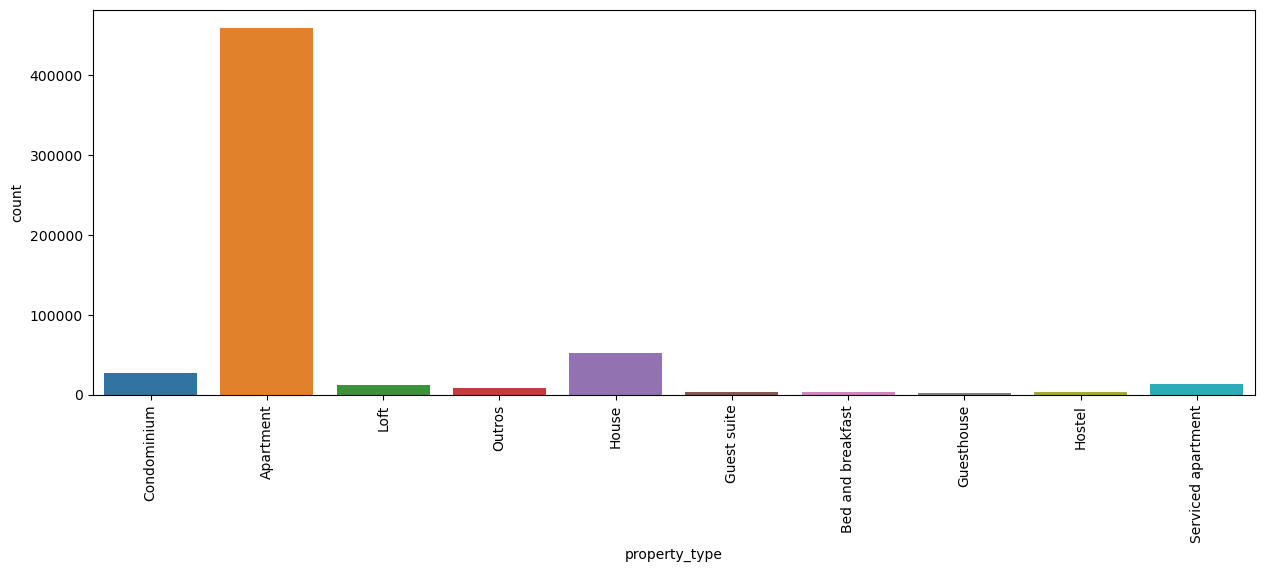

In [42]:
tabela_tipos_casa = base_airbnb["property_type"].value_counts()
colunas_agrupar = []

for tipo in tabela_tipos_casa.index:
    if tabela_tipos_casa[tipo] < 2000:
        colunas_agrupar.append(tipo)
print(colunas_agrupar)

for tipo in colunas_agrupar:
    base_airbnb.loc[base_airbnb["property_type"]==tipo, "property_type"] = "Outros"

print(base_airbnb["property_type"].value_counts())
plt.figure(figsize=(15, 5))
grafico = sns.countplot("property_type", data=base_airbnb)
grafico.tick_params(axis="x", rotation=90)

- room_type

Entire home/apt    372443
Private room       196859
Shared room         11714
Hotel room            967
Name: room_type, dtype: int64


/Users/gabrielluiz/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


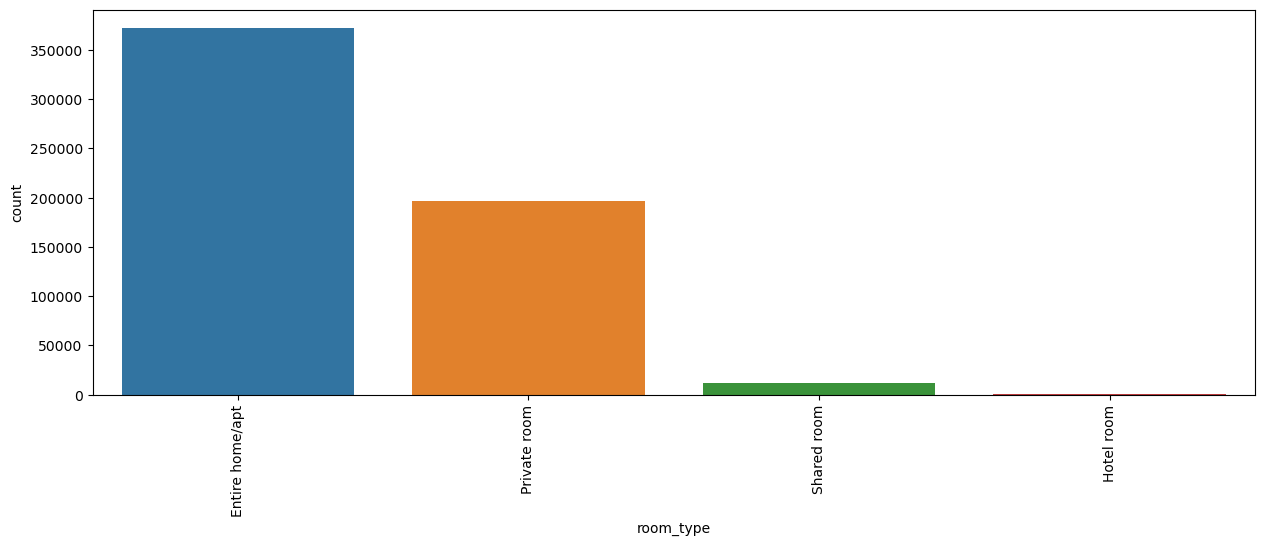

In [43]:
print(base_airbnb["room_type"].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot("room_type", data=base_airbnb)
grafico.tick_params(axis="x", rotation=90)

#Não alterar pois são apenas 4 categorias. Não existem categorias menores para agrupar, neste sentido, não terá impacto significativo na análise. 

- bed_type

Real Bed         570643
Pull-out Sofa      8055
Futon              1634
Airbed             1155
Couch               496
Name: bed_type, dtype: int64


/Users/gabrielluiz/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


['Pull-out Sofa', 'Futon', 'Airbed', 'Couch']
Real Bed    570643
Outros       11340
Name: bed_type, dtype: int64


/Users/gabrielluiz/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


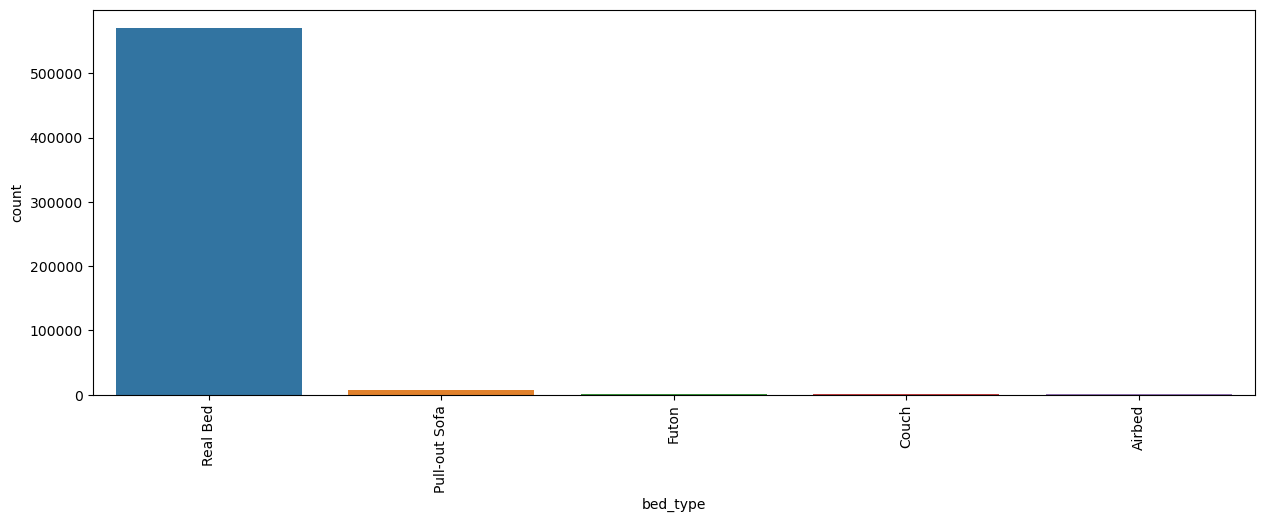

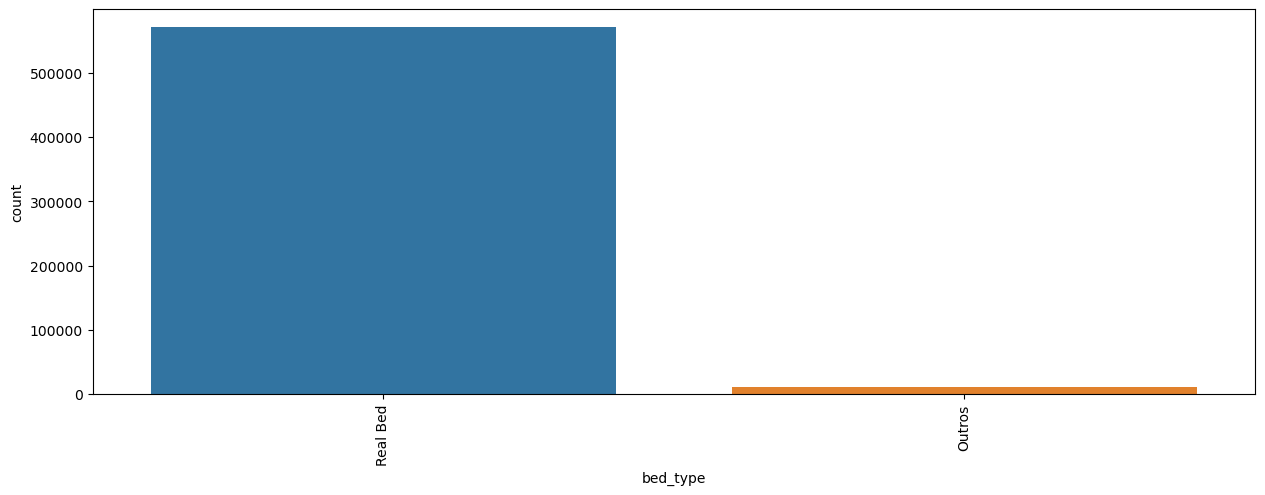

In [44]:
print(base_airbnb["bed_type"].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot("bed_type", data=base_airbnb)
grafico.tick_params(axis="x", rotation=90)

# agrupando categorias de bed_type
tabela_bed = base_airbnb["bed_type"].value_counts()
colunas_agrupar = []

for tipo in tabela_bed.index:
    if tabela_bed[tipo] < 10000:
        colunas_agrupar.append(tipo)
print(colunas_agrupar)

for tipo in colunas_agrupar:
    base_airbnb.loc[base_airbnb["bed_type"]==tipo, "bed_type"] = "Outros"

print(base_airbnb["bed_type"].value_counts())
plt.figure(figsize=(15, 5))
grafico = sns.countplot("bed_type", data=base_airbnb)
grafico.tick_params(axis="x", rotation=90)

- cancellation_policy

flexible                       258096
strict_14_with_grace_period    200743
moderate                       113281
strict                           9696
super_strict_60                   135
super_strict_30                    32
Name: cancellation_policy, dtype: int64


/Users/gabrielluiz/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


['strict', 'super_strict_60', 'super_strict_30']
flexible                       258096
strict_14_with_grace_period    200743
moderate                       113281
strict                           9863
Name: cancellation_policy, dtype: int64


/Users/gabrielluiz/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


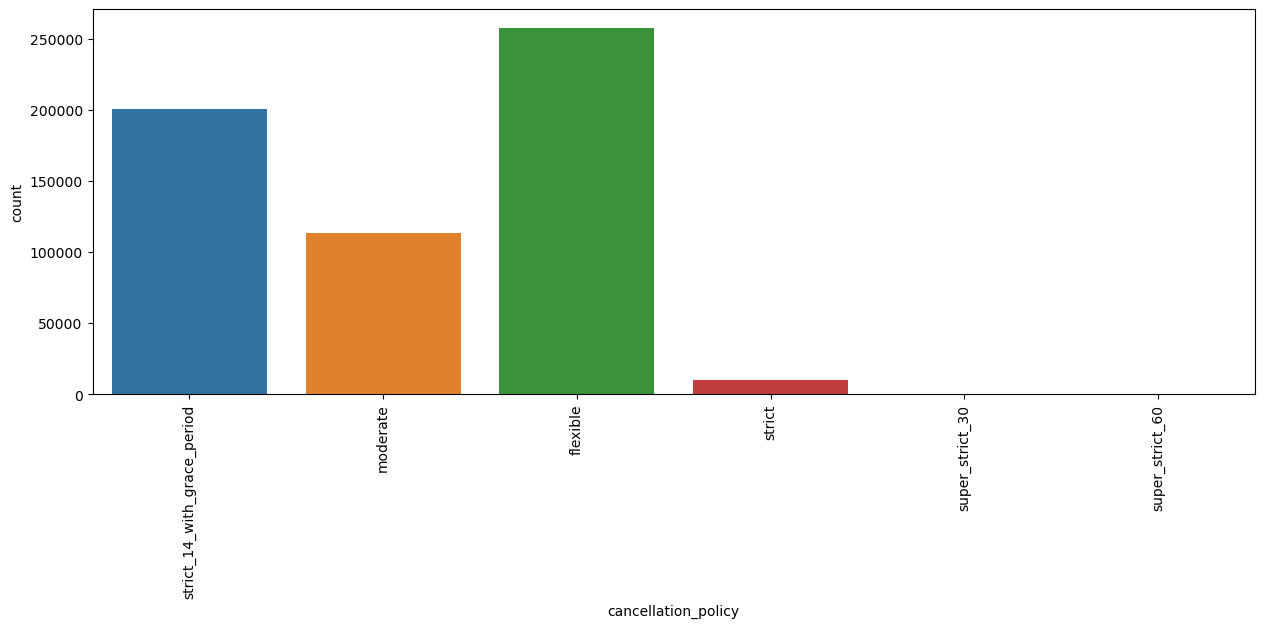

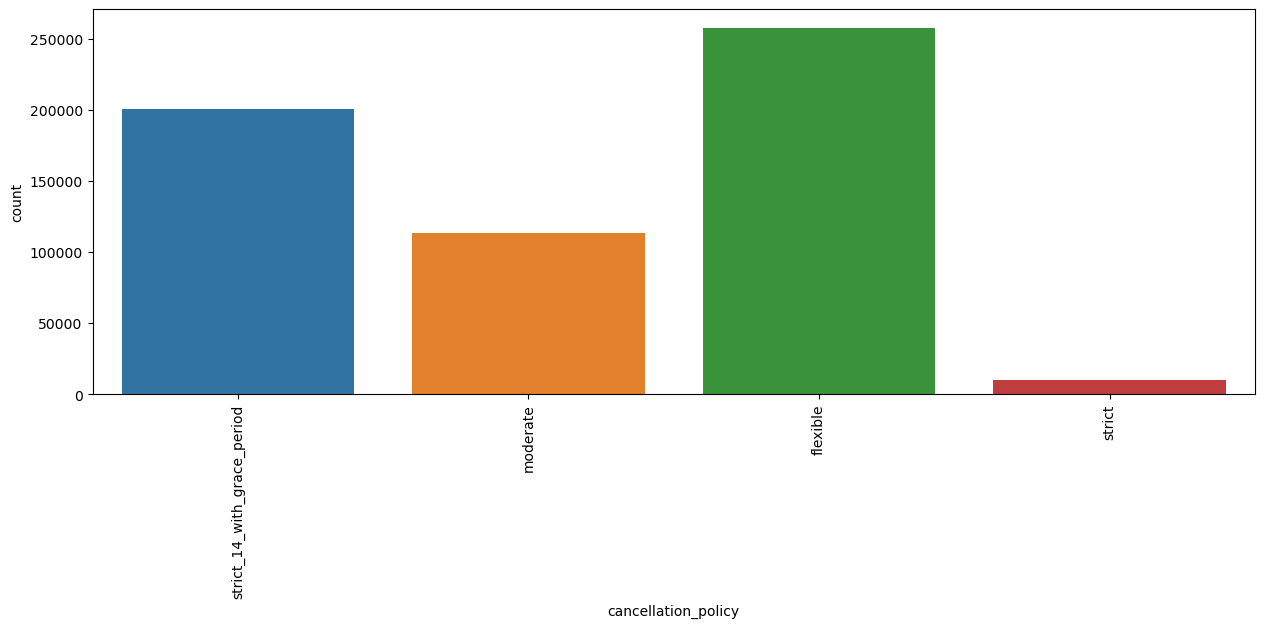

In [45]:
print(base_airbnb["cancellation_policy"].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot("cancellation_policy", data=base_airbnb)
grafico.tick_params(axis="x", rotation=90)

# agrupando categorias de cancellation_policy
tabela_cancellation = base_airbnb["cancellation_policy"].value_counts()
colunas_agrupar = []

for tipo in tabela_cancellation.index:
    if tabela_cancellation[tipo] < 10000:
        colunas_agrupar.append(tipo)
print(colunas_agrupar)

for tipo in colunas_agrupar:
    base_airbnb.loc[base_airbnb["cancellation_policy"]==tipo, "cancellation_policy"] = "strict"

print(base_airbnb["cancellation_policy"].value_counts())
plt.figure(figsize=(15, 5))
grafico = sns.countplot("cancellation_policy", data=base_airbnb)
grafico.tick_params(axis="x", rotation=90)


- amenities

Como a base possui uma diversidade grande de amenities e, por vezes, as mesmas amenities podem apresentar nomenclaturas distintas, será avaliada a quantidade de amenities como o parâmetro para o modelo. 

In [46]:
print(base_airbnb["amenities"].iloc[1].split(","))
print(len(base_airbnb["amenities"].iloc[1].split(",")))

base_airbnb["n_amenities"] = base_airbnb["amenities"].str.split(",").apply(len)

['{TV', '"Cable TV"', 'Internet', 'Wifi', '"Air conditioning"', 'Kitchen', 'Doorman', 'Elevator', '"Buzzer/wireless intercom"', 'Heating', 'Washer', 'Dryer', 'Essentials', 'Shampoo', '"24-hour check-in"', 'Hangers', '"Hair dryer"', 'Iron', '"Laptop friendly workspace"}']
19


In [47]:
base_airbnb = base_airbnb.drop("amenities", axis=1)
base_airbnb.shape

(581983, 20)

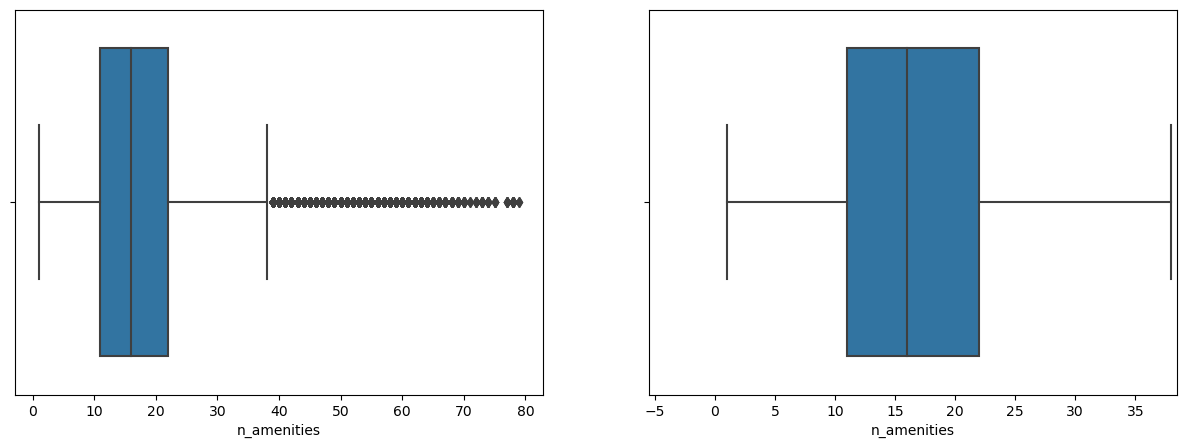

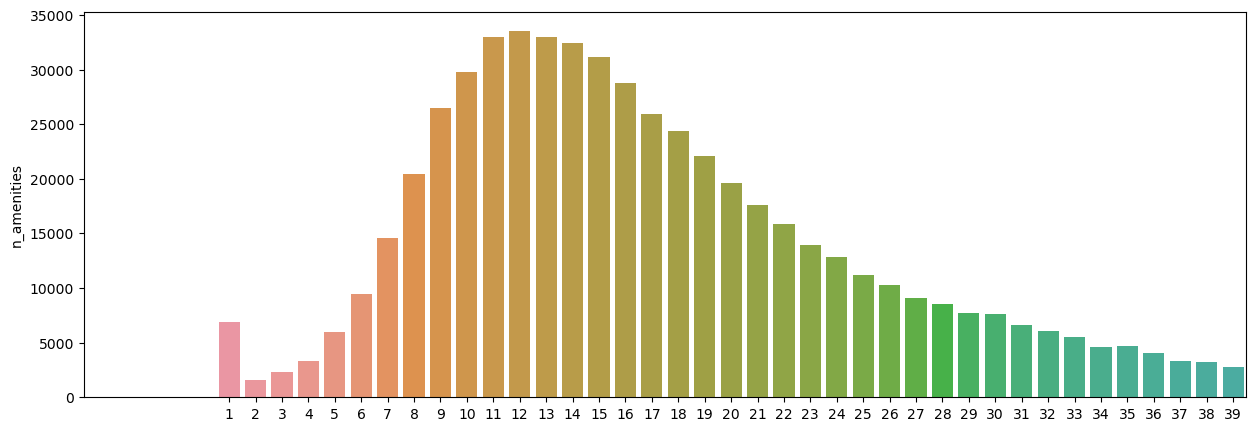

In [48]:
diagrama_caixa(base_airbnb["n_amenities"])
grafico_barra(base_airbnb["n_amenities"])

In [49]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, "n_amenities")
print("{} linhas removidas".format(linhas_removidas))

24343 linhas removidas


### Visualização de Mapa de Propriedades

In [50]:
amostra = base_airbnb.sample(n=50000)
centro_mapa = {"lat":amostra.latitude.mean(), "lon":amostra.longitude.mean()}
mapa = px.density_mapbox(amostra, lat="latitude", lon="longitude", z="price", radius=2.5, 
                         center=centro_mapa, zoom=10, 
                         mapbox_style="open-street-map")
mapa.show()

### Encoding

Necessário ajustar as features para facilitar o trabalho do modelo futuro (features de categoria, true & false, etc.)
- Features de Valores True ou False, foram substituídas da seguinte maneira: True = 1 e False = 0
- Features de Categoria (features em que os valores da coluna são textos) foi utilizado o método de encoding de variáveis dummies.

In [51]:
colunas_tf = ["host_is_superhost", "instant_bookable", "is_business_travel_ready"]
base_airbnb_cod = base_airbnb.copy()
for coluna in colunas_tf:
    base_airbnb_cod.loc[base_airbnb_cod[coluna]=="t", coluna] = 1
    base_airbnb_cod.loc[base_airbnb_cod[coluna]=="f", coluna] = 0

In [52]:
colunas_categorias = ["property_type", "room_type", "bed_type", "cancellation_policy"]
base_airbnb_cod = pd.get_dummies(data=base_airbnb_cod, columns=colunas_categorias)
display(base_airbnb_cod.head())

host_is_superhost  host_listings_count  latitude  longitude  accommodates  \
0                 1                  2.0 -22.96592  -43.17896             5   
1                 0                  0.0 -22.98467  -43.19611             6   
2                 0                  3.0 -22.97712  -43.19045             2   
3                 1                  1.0 -22.98302  -43.21427             3   
4                 0                  1.0 -22.98816  -43.19359             2   

   bathrooms  bedrooms  beds  price  extra_people  ...  \
0        1.0       2.0   2.0  332.0          63.0  ...   
1        2.0       2.0   4.0  336.0           0.0  ...   
2        1.0       1.0   2.0  159.0          45.0  ...   
3        1.0       1.0   2.0  273.0          42.0  ...   
4        1.5       1.0   1.0  378.0          63.0  ...   

   room_type_Entire home/apt room_type_Hotel room room_type_Private room  \
0                          1                    0                      0   
1                          1                    0                      0   
2                          1                    0                      0   
3                          1                    0                      0   
4                          1                    0                      0   

   room_type_Shared room  bed_type_Outros  bed_type_Real Bed  \
0                      0                0                  1   
1                      0                0                  1   
2                      0                0                  1   
3                      0                0                  1   
4                      0                0                  1   

   cancellation_policy_flexible  cancellation_policy_moderate  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   cancellation_policy_strict  cancellation_policy_strict_14_with_grace_period  
0                           0                                                1  
1                           0                                                1  
2                           0                                                1  
3                           0                                                1  
4                           0                                                1  

[5 rows x 36 columns]

### Modelo de Previsão

- Métricas de Avaliação

In [63]:
def avaliar_modelo(nome_modelo, y_teste, previsao):
    r2 = r2_score(y_teste, previsao)
    RSME = np.sqrt(mean_squared_error(y_teste, previsao))
    return f"Modelo {nome_modelo}:\nR2:{r2:.2%}\nRSME:{RSME:.2f}"

- Escolha dos Modelos a Serem Testados
1. RandomForest
2. LinearRegression
3. Extra Tree

In [61]:
modelo_rf = RandomForestRegressor()
modelo_lr = LinearRegression()
modelo_et = ExtraTreesRegressor()

modelos = {"RandomForest": modelo_rf,
           "LinearRegression": modelo_lr,
           "ExtraTrees": modelo_et,
           }

y = base_airbnb_cod["price"]
x = base_airbnb_cod.drop("price", axis=1)

* Separar os dados em Treino e Teste + Treino do Modelo

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10)

for nome_modelo, modelo in modelos.items():
    #treinar
    modelo.fit(x_train, y_train)
    #testar
    previsao = modelo.predict(x_test)
    print(avaliar_modelo(nome_modelo, y_test, previsao))

Modelo RandomForest:
R2:0.9714343129405283
RSME:44.765624468351824
Modelo LinearRegression:
R2:0.3289047553139137
RSME:216.9773450430872
Modelo ExtraTrees:
R2:0.9733437815585766
RSME:43.2435739052685


### Análise do Melhor Modelo

In [64]:
for nome_modelo, modelo in modelos.items():
    #testar
    previsao = modelo.predict(x_test)
    print(avaliar_modelo(nome_modelo, y_test, previsao))

Modelo RandomForest:
R2:97.14%
RSME:44.77
Modelo LinearRegression:
R2:32.89%
RSME:216.98
Modelo ExtraTrees:
R2:97.33%
RSME:43.24


- Modelo Escolhido como Melhor Modelo: ExtraTreesRegressor

Após realizar os testes, o modelo ExtraTreesRegressor destacou-se por apresentar maior valor de R2 e ao mesmo tempo o menor valor de RSME. Como não houve uma grande diferença de velocidade de treino e de previsão deste modelo com o modelo de RandomForest (no qual apresentou resultados próximos de R2 e RSME) foi definido o Modelo ExtraTrees.

O modelo de regressão linear não obteve um resultado satisfatório, apresentou valores de R2 e RSME muito piores do que os outros 2 modelos. 

- Resultados das Métricas de Avaliação no Modelo Vencedor:
Modelo ExtraTrees:<br>
R2:97.33%<br>
RSME:43.24

### Ajustes e Melhorias no Melhor Modelo

0
bedrooms                                         0.114001
latitude                                         0.104351
longitude                                        0.101155
n_amenities                                      0.089218
extra_people                                     0.086409
accommodates                                     0.074842
bathrooms                                        0.071327
minimum_nights                                   0.066041
room_type_Entire home/apt                        0.061631
beds                                             0.052850
host_listings_count                              0.039400
instant_bookable                                 0.021744
cancellation_policy_flexible                     0.019226
host_is_superhost                                0.013330
property_type_Apartment                          0.012895
cancellation_policy_moderate                     0.012305
ano                                              0.011445
cancellation_policy_strict_14_with_grace_period  0.007623
property_type_House                              0.007040
property_type_Condominium                        0.005428
mes                                              0.004673
room_type_Private room                           0.004425
bed_type_Real Bed                                0.002703
bed_type_Outros                                  0.002649
property_type_Outros                             0.002323
property_type_Serviced apartment                 0.002320
property_type_Loft                               0.002176
room_type_Shared room                            0.001846
property_type_Bed and breakfast                  0.001284
property_type_Guesthouse                         0.000945
cancellation_policy_strict                       0.000820
property_type_Guest suite                        0.000700
property_type_Hostel                             0.000658
room_type_Hotel room                             0.000220
is_business_travel_ready                         0.000000

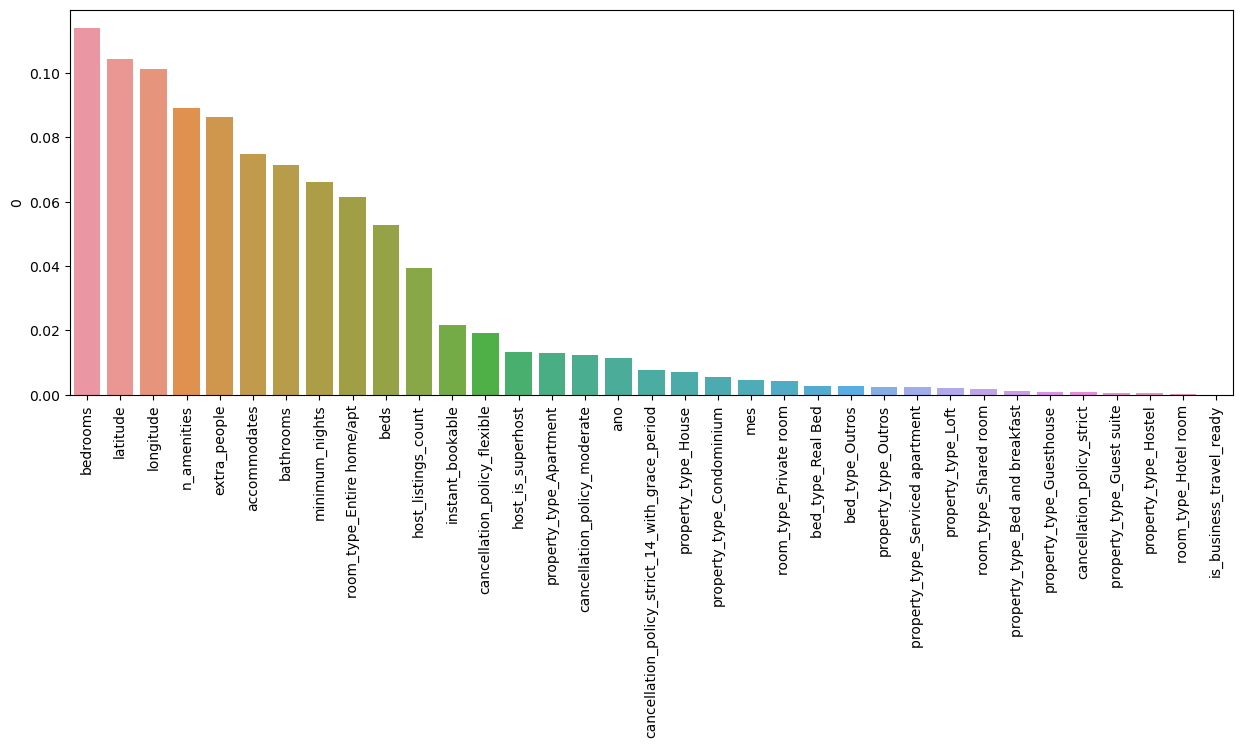

In [70]:
#print(modelo_et.feature_importances_)
#print(x_train.columns)
importancia_features = pd.DataFrame(modelo_et.feature_importances_, x_train.columns)
importancia_features = importancia_features.sort_values(by=0, ascending=False)
display(importancia_features)
plt.figure(figsize=(15, 5))
ax = sns.barplot(x=importancia_features.index, y=importancia_features[0])
ax.tick_params(axis="x", rotation=90)

### Ajustes Finais no Modelo

- is_business_travel_ready não aparentou impactar de maneira relevante o modelo. Por este motivo, com o intuito de garantir um modelo mais simples, essa feature foi excluída para testar o modelo sem ela.

In [71]:
base_airbnb_cod = base_airbnb_cod.drop("is_business_travel_ready", axis=1)

y = base_airbnb_cod["price"]
x = base_airbnb_cod.drop("price", axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10)

#treinar
modelo_et.fit(x_train, y_train)
#testar
previsao = modelo_et.predict(x_test)
print(avaliar_modelo("ExtraTrees", y_test, previsao))

Modelo ExtraTrees:
R2:97.31%
RSME:43.48


In [73]:
base_teste = base_airbnb_cod.copy()
for coluna in base_teste:
    if "bed_type" in coluna:
        base_teste = base_teste.drop(coluna, axis=1)
print(base_teste.columns)
y = base_teste["price"]
x = base_teste.drop("price", axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10)

#treinar
modelo_et.fit(x_train, y_train)
#testar
previsao = modelo_et.predict(x_test)
print(avaliar_modelo("ExtraTrees", y_test, previsao))

Index(['host_is_superhost', 'host_listings_count', 'latitude', 'longitude',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'extra_people', 'minimum_nights', 'instant_bookable', 'ano', 'mes',
       'n_amenities', 'property_type_Apartment',
       'property_type_Bed and breakfast', 'property_type_Condominium',
       'property_type_Guest suite', 'property_type_Guesthouse',
       'property_type_Hostel', 'property_type_House', 'property_type_Loft',
       'property_type_Outros', 'property_type_Serviced apartment',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room',
       'cancellation_policy_flexible', 'cancellation_policy_moderate',
       'cancellation_policy_strict',
       'cancellation_policy_strict_14_with_grace_period'],
      dtype='object')
Modelo ExtraTrees:
R2:97.31%
RSME:43.41


### Deploy do Projeto

Passo 1 -> Criar arquivo do Modelo(joblib)

Passo 2 -> Escolher a forma de deploy:
- Arquivo Executável + Tkinter
- Deploy em um Microsite (Flask)
- Deploy apenas para uso direto (Streamlit)

Passo 3 -> Arquivo Python (pode ser Jupyter ou PyCharm)

Passo 4 -> Importar streamlit e criar código

Passo 5 -> Atribuir ao botão o carregamento do modelo

Passo 6 -> Deploy feito

In [75]:
x["price"] = y
x.to_csv("dados.csv")

In [76]:
import joblib
joblib.dump(modelo_et, "modelo.joblib")

['modelo.joblib']